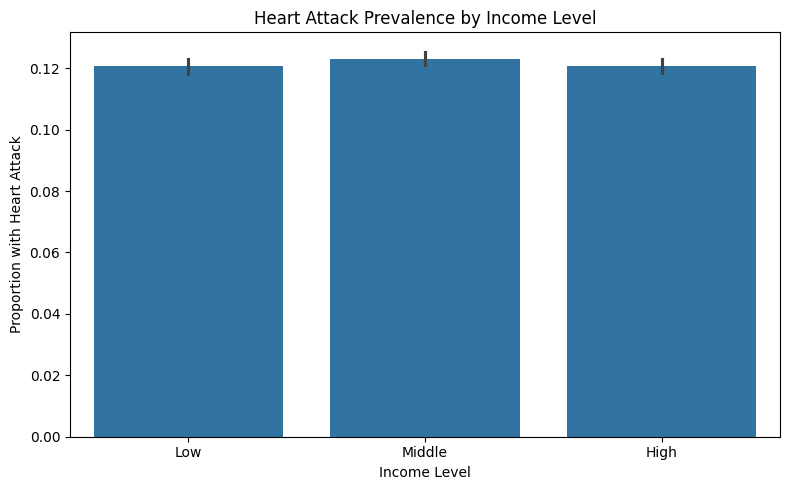

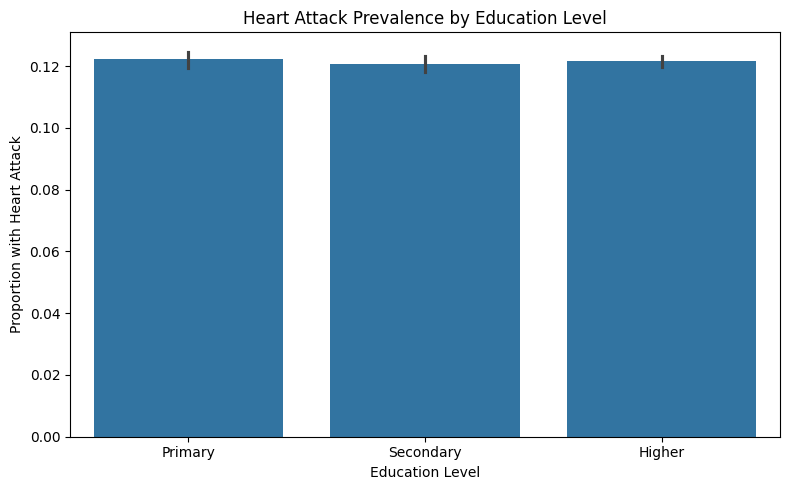

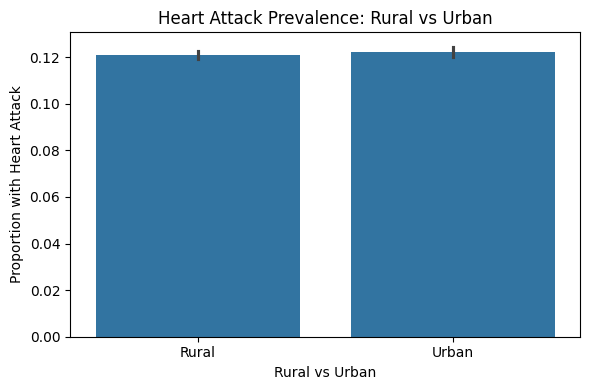

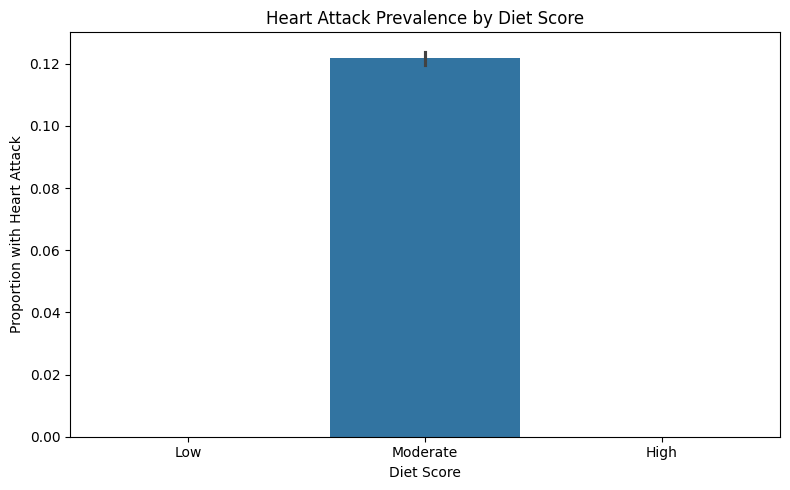

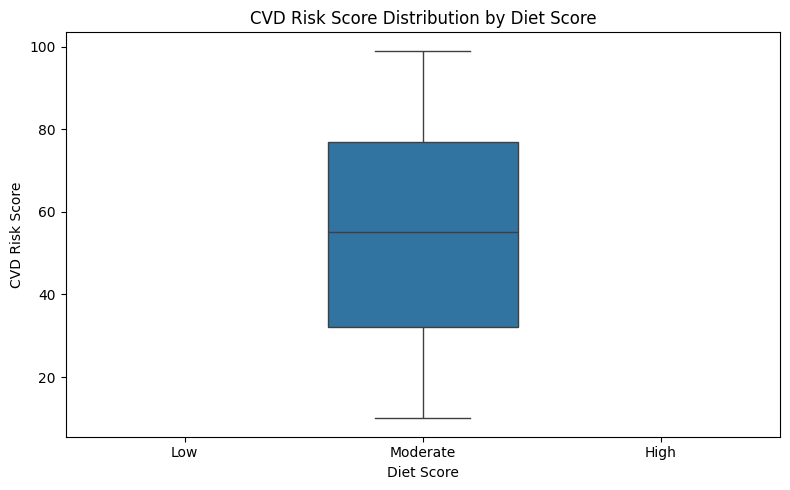

ValueError: could not convert string to float: 'Normal'

<Figure size 600x500 with 0 Axes>

In [2]:
# === Cardiovascular Disease Visualisations: Dataset 1 (China) ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# --- Load cleaned dataset ---
df = pd.read_csv("cleaned_dataset1.csv")

# Ensure target is numeric
df["heart_attack"] = df["heart_attack"].astype(int)

# =========================
# Q1. Socioeconomic status → CVD
# =========================
plt.figure(figsize=(8,5))
sns.barplot(x="income_level", y="heart_attack", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Heart Attack Prevalence by Income Level")
plt.ylabel("Proportion with Heart Attack")
plt.xlabel("Income Level")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="education_level", y="heart_attack", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Heart Attack Prevalence by Education Level")
plt.ylabel("Proportion with Heart Attack")
plt.xlabel("Education Level")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="rural_or_urban", y="heart_attack", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Heart Attack Prevalence: Rural vs Urban")
plt.ylabel("Proportion with Heart Attack")
plt.xlabel("Rural vs Urban")
plt.tight_layout()
plt.show()

# =========================
# Q2. Diet Variability → CVD
# =========================
plt.figure(figsize=(8,5))
sns.barplot(x="diet_score", y="heart_attack", data=df, estimator=lambda x: sum(x)/len(x),
            order=["Low", "Moderate", "High"])
plt.title("Heart Attack Prevalence by Diet Score")
plt.ylabel("Proportion with Heart Attack")
plt.xlabel("Diet Score")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="diet_score", y="cvd_risk_score", data=df,
            order=["Low", "Moderate", "High"])
plt.title("CVD Risk Score Distribution by Diet Score")
plt.xlabel("Diet Score")
plt.ylabel("CVD Risk Score")
plt.tight_layout()
plt.show()

# Correlation heatmap
corr_vars = ["cvd_risk_score", "diet_score", "cholesterol_level", "blood_pressure"]
# Convert diet_score to numeric rank for correlation
df["diet_score_num"] = df["diet_score"].map({"Low":1, "Moderate":2, "High":3})
plt.figure(figsize=(6,5))
sns.heatmap(df[["cvd_risk_score", "diet_score_num", "cholesterol_level", "blood_pressure"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Diet & Biomarkers)")
plt.tight_layout()
plt.show()

# =========================
# Q3. Sleep → CVD
# =========================
print("Q3 skipped: no sleep data in Dataset 1")

# =========================
# Q4. Multiple Risk Factors → CVD
# =========================
risk_factors = ["smoking_status", "diabetes", "hypertension", "obesity"]

# Convert categorical smoking_status → binary (1 = Smoker, 0 = Non-Smoker)
df["smoker"] = df["smoking_status"].map({"Smoker":1, "Non-Smoker":0})

# Risk factor count
df["risk_factor_count"] = df[["smoker","diabetes","hypertension","obesity"]].sum(axis=1)

plt.figure(figsize=(8,5))
sns.barplot(x="risk_factor_count", y="heart_attack", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Heart Attack Prevalence by Number of Risk Factors")
plt.ylabel("Proportion with Heart Attack")
plt.xlabel("Risk Factor Count")
plt.tight_layout()
plt.show()

# Heatmap of combinations
pivot = pd.crosstab(
    [df["smoker"], df["diabetes"], df["hypertension"], df["obesity"]],
    df["heart_attack"], normalize="index"
)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="Blues", cbar=False)
plt.title("Heart Attack Prevalence by Risk Factor Combinations")
plt.tight_layout()
plt.show()



In [ ]:
import statsmodels.api as sm
# Logistic regression
X = df[["diet_score_num", "cholesterol_level", "blood_pressure", "smoker", "diabetes", "hypertension", "obesity"]]
y = df["heart_attack"]
X = sm.add_constant(X)

model = sm.Logit(y, X).fit(disp=0)
print(model.summary())
